# ACTIVIDAD 3 LABORATORIO EN AA

Esta Activivad esta realizada por el alumno perteneciente al grupo 4 del master MIA
    * Jose Manuel Alcaide Carrera.

* los Objetivos del laboratorio consiste en:
    * Aplicar e interpretar los resultados de un algoritmo de Clustering aplicado sobre el conjunto de datos. 
    * Se recomienda la aplicación del algoritmo K-MEANS.

* Descripción de la actividad:

    * Análisis descriptivo de los datos.
    * Determinar el conjunto de modelización y el de validación.
    * Tratamiento de missing.
    * Calcular las métricas de evaluación de ajuste adecuadas.
    * Comentar los resultados obtenidos.
    * Otros comentarios que parezcan adecuados.


* https://archive.ics.uci.edu/ml/datasets/Wholesale+customers
* Contiene la información necesaria sobre los datos


In [1]:
import pandas as pd
import numpy as np




import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go

%matplotlib inline


from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
import os



warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

* Cargamos las librerias necesarias para la realización de la actividad.

In [2]:
np.random.seed(2020)

* Introducimos una semilla para que sea reporoducible el ejercicio y siempre nos devuelva el mismo resultado.

In [3]:
data = pd.read_csv("Wholesale_customers_data.csv")

* Cargamos los datos

In [4]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


* Vemos las dimensiones del conjunto de datos

In [5]:
data.shape

(440, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [7]:
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

* El conjunto de datos no tiene valores perdidos.

In [8]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


* Resumen: El conjunto de datos se refiere a clientes de un distribuidor mayorista. Incluye el gasto anual en unidades monetarias (m.u.) en diversas categorías de productos. Observamos que existen mucha variabilidad en los datos, aun estando en la misma unidad monetaria, pues hay mucha diferencia entre valores minimos y máximos. Por ejemplo si nos fijamos en la variable 'Fresh' el valor mas pequeño es 3 y el mas alto es 112151. A la hora de modelar necesitaremos transformar las variables.

* Descripcion de Variables: 
    * FRESH: gastos anual (m.u.) en productos frescos;
    * MILK: gastos anuales (m.u.) en productos lacteos;
    * GROCERY: gasto anual(m.u.) en productos comestibles;
    * FROZEN: gasto anual(m.u.) en productos congelados;
    * DETERGENTS_PAPER: gasto anual(m.u.) en detergentes y productos de papel;
    * DELICATESSEN: gasto anual (m.u.) en productos delicatessen;
    * CHANNEL: canal de compra: Horeca (298)(Hotel/Restaurant/Café) o Retail (142);
    * REGION: Region del comparador: Lisboa (77), Oporto (47) or Other(316);

* Visualización de los datos

In [9]:
plt.style.use('fivethirtyeight')

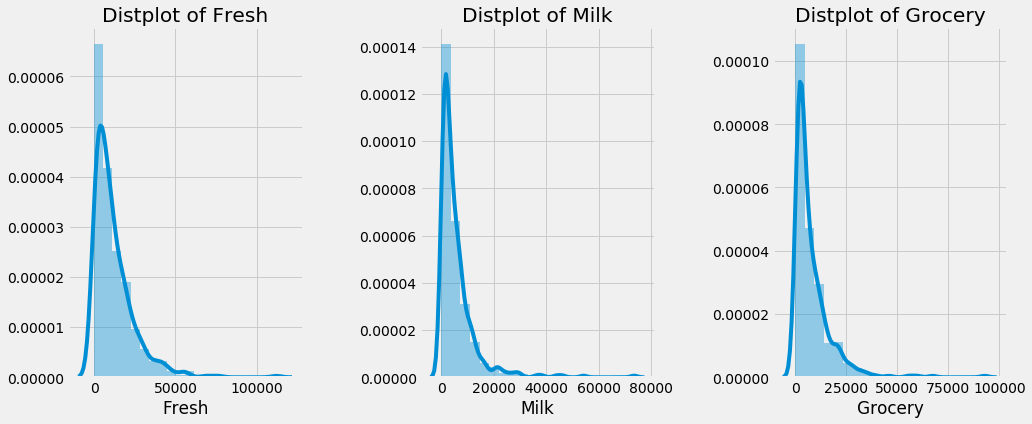

In [10]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Fresh' , 'Milk' , 'Grocery']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(data[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

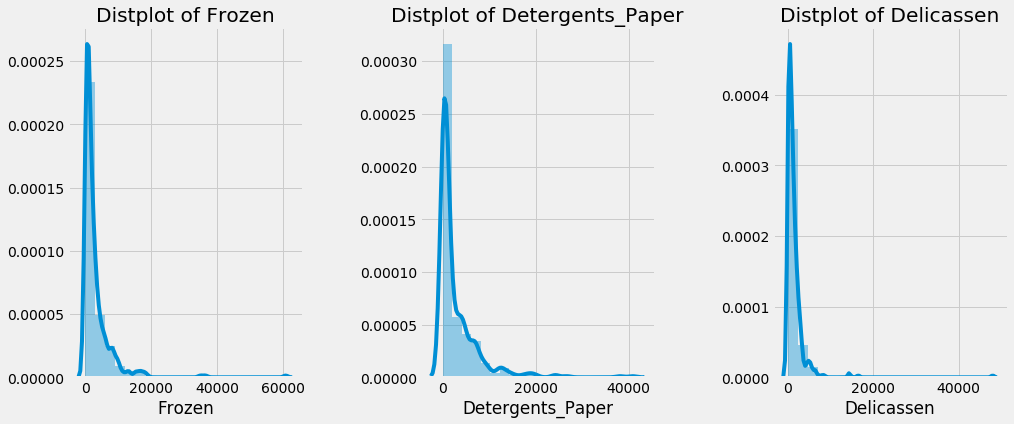

In [11]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Frozen', 'Detergents_Paper', 'Delicassen']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(data[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()


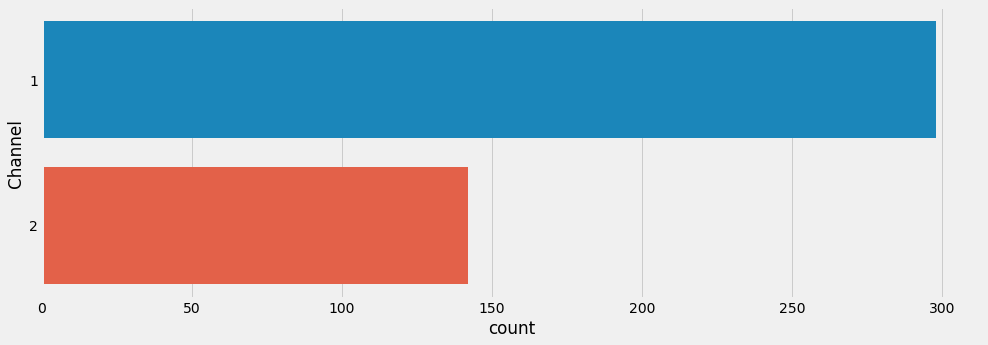

In [12]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Channel' , data = data)
plt.show()

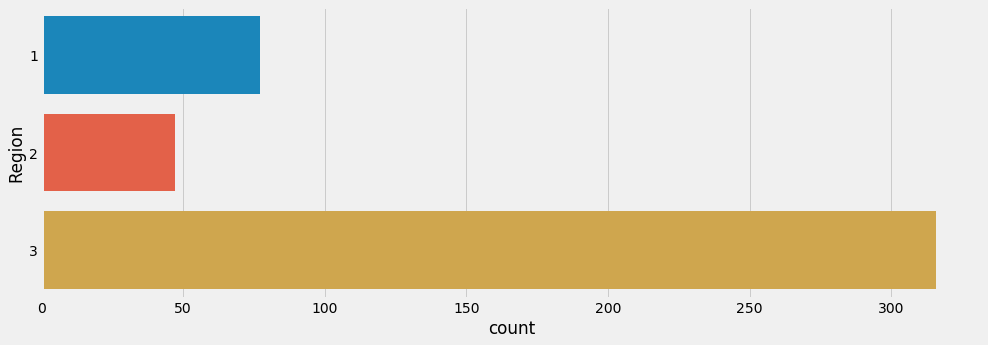

In [13]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Region' , data = data)
plt.show()

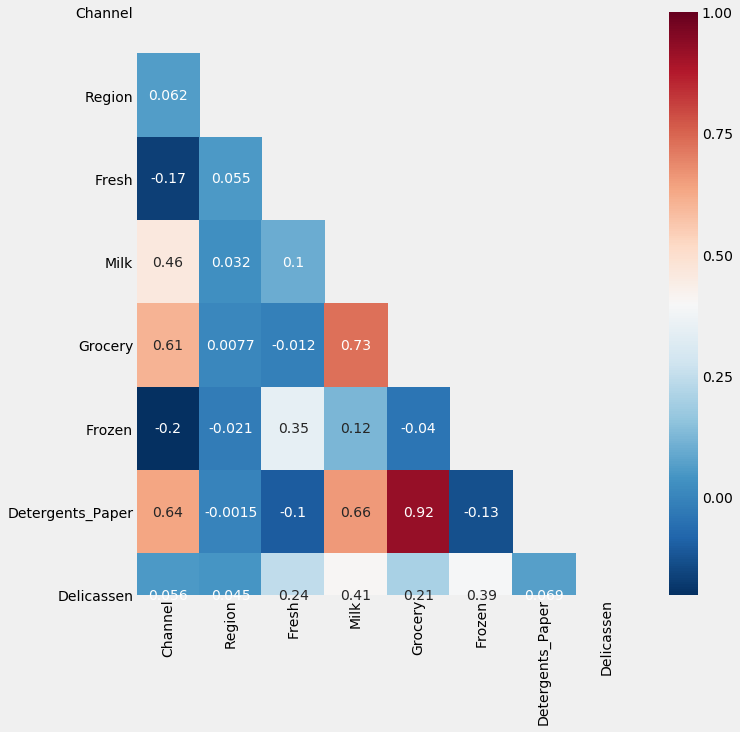

In [14]:
plt.figure(figsize=(10,10))
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data.corr(),cmap='RdBu_r',mask=mask, annot=True)

* Vamos a eliminar las variables Region y Channel pues con ellas se podrain agrupar perfectamente, y no es lo que buscamos en el ejercicio.

In [15]:
data.drop(['Region', 'Channel'], axis = 1, inplace = True)

In [16]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


* Verificamos que se han eliminado las varibles

* Normalización de las variables. Para ello vamos a usar tres metodos posibles y ver su representacion grafica despues de la operacion y decidimos en consecuencia que cual usar.

* 1.- Normalización usando el metodo  'MIN_MAX'

In [17]:
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(data) 
data.loc[:,:] = scaled_values

In [18]:
df_min_max = data

In [19]:
df_min_max.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


* 2.- Normalizaciòn usando el método STANDAR_SCALE

In [20]:
data = pd.read_csv("Wholesale_customers_data.csv")

In [21]:
data.drop(['Region', 'Channel'], axis = 1, inplace = True)

In [22]:
scaler = StandardScaler() 
scaled_values = scaler.fit_transform(data) 
data.loc[:,:] = scaled_values

In [23]:
df_sc = data

In [24]:
df_sc.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


* 3.-Como después observaremos, lo mejor para poder aplicar el modelo, realizar previamente una transformación logarítmica al conjunto de datos, pues existen mucha diferencia entre valores mínimos y máximos. 

In [25]:
data = pd.read_csv("Wholesale_customers_data.csv")

In [26]:
data.drop(['Region', 'Channel'], axis = 1, inplace = True)

In [27]:
df_log = np.log(data)

In [28]:
df_log.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


* Visualización de los datos con su normalización MIN-MAX

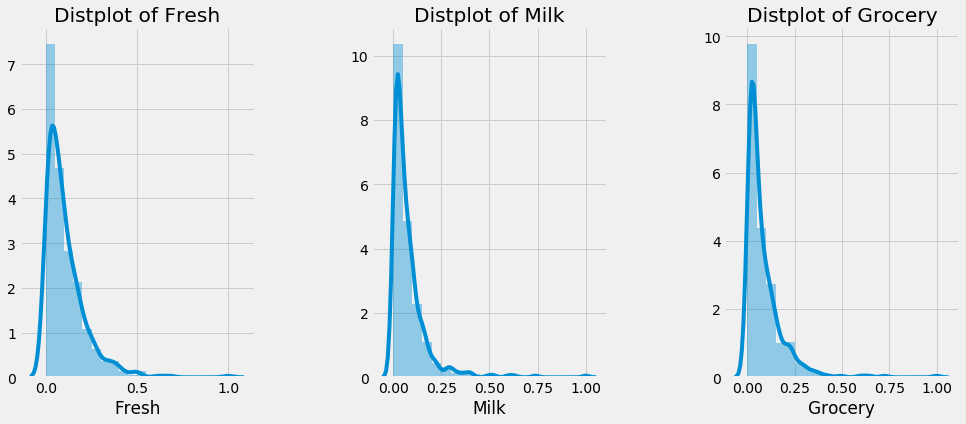

In [29]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Fresh' , 'Milk' , 'Grocery']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df_min_max[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

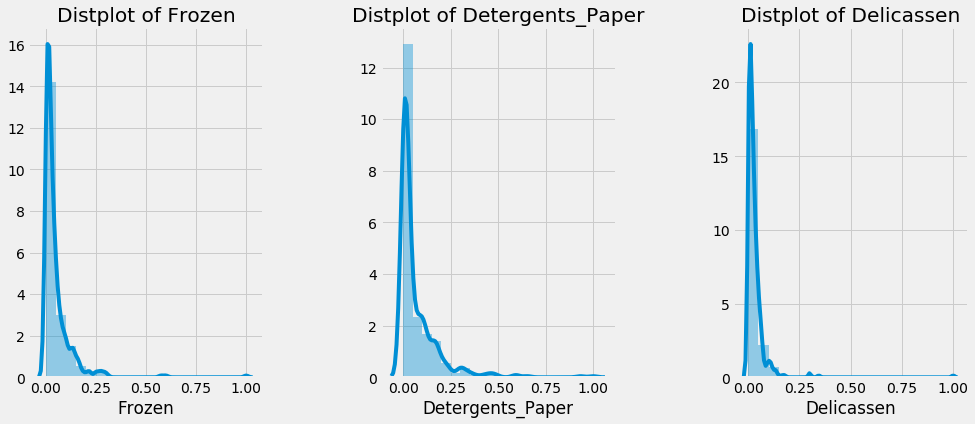

In [30]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Frozen', 'Detergents_Paper', 'Delicassen']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df_min_max[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

* Visualización de los datos con su normalización Standar_scale

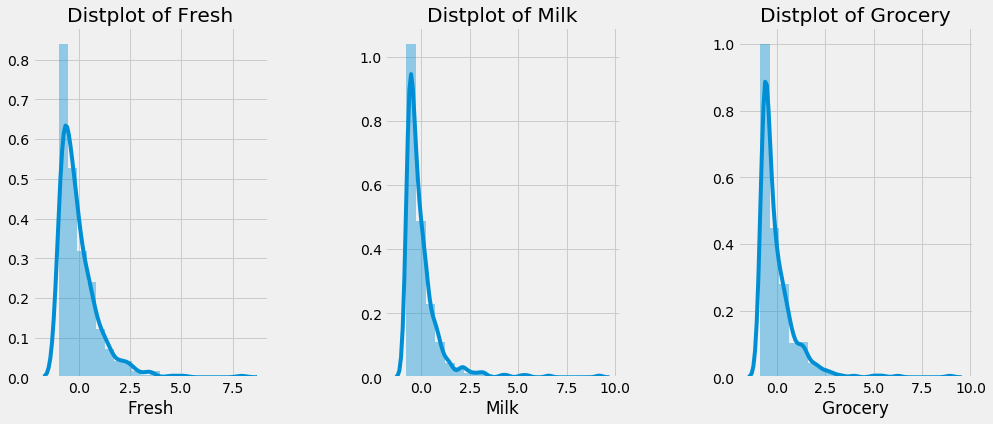

In [31]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Fresh' , 'Milk' , 'Grocery']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df_sc[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

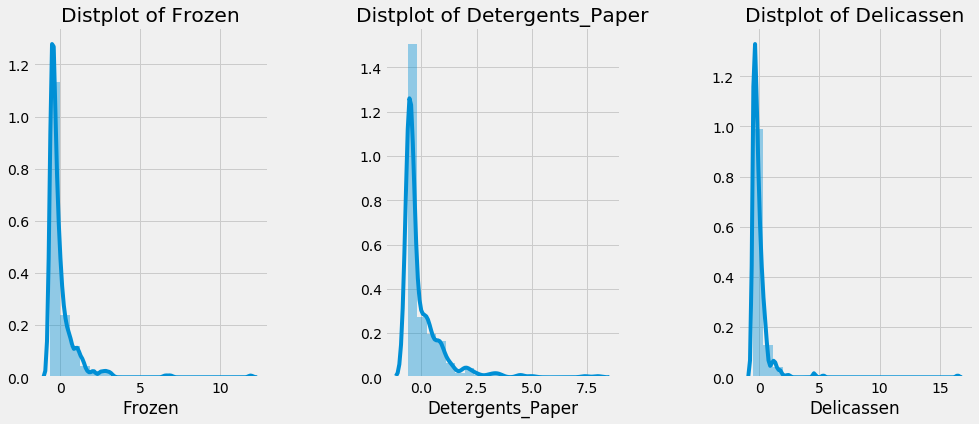

In [32]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Frozen', 'Detergents_Paper', 'Delicassen']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df_sc[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

* Visualización de los datos con la transformación logarítmica.

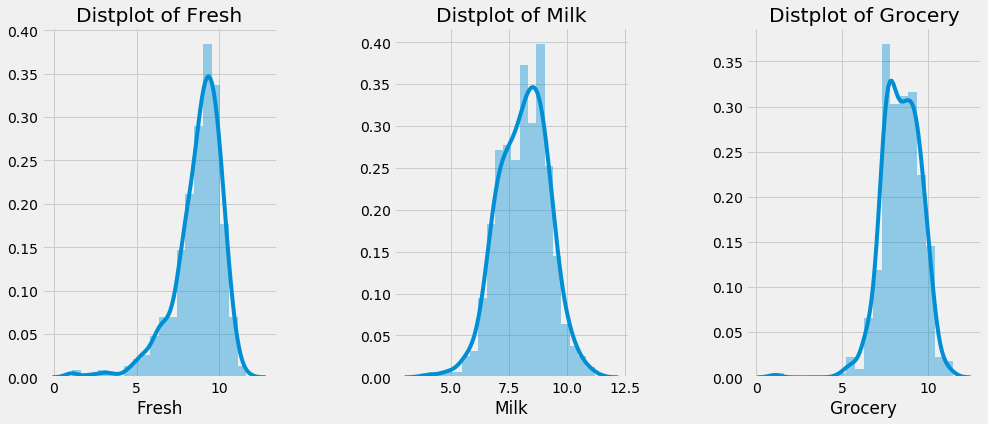

In [33]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Fresh' , 'Milk' , 'Grocery']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df_log[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

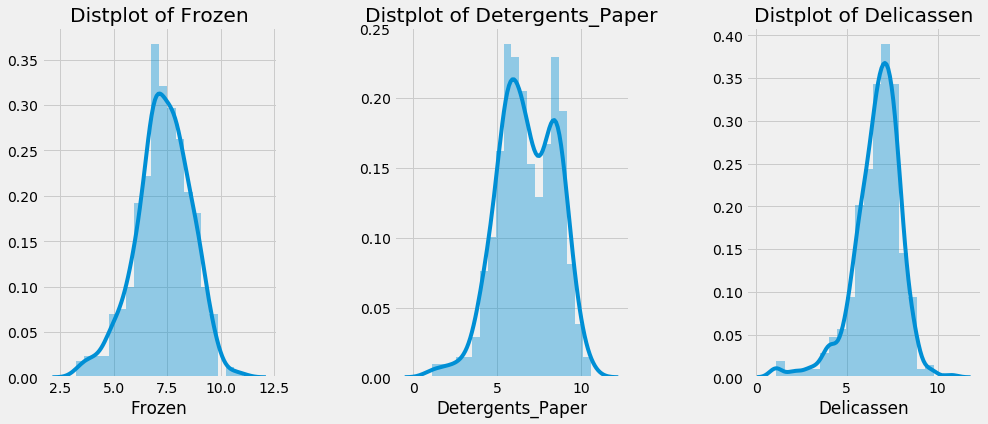

In [34]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Frozen', 'Detergents_Paper', 'Delicassen']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df_log[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

In [35]:
df_log.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,8.730544,8.121047,8.441169,7.301396,6.785972,6.665133
std,1.480071,1.081365,1.116172,1.284540,1.721020,1.310832
min,1.098612,4.007333,1.098612,3.218876,1.098612,1.098612
25%,8.048059,7.334981,7.674616,6.609678,5.548101,6.011875
50%,9.048286,8.196159,8.467057,7.330388,6.705018,6.872645
75%,9.737064,8.880480,9.273854,8.175896,8.274341,7.506728
max,11.627601,11.205013,11.437986,11.016479,10.617099,10.777768


* Como conlusión podemos decir, que las dos primeras transformaciones no serian buenas para el modelo pues no hay variación en sus distribuciones,una vez trasnfromadas, pero en el último caso si se observa cambios en las distribuciones por lo tanto le pueden venir mejor al modelo ya que el modelo K-MEANS aplica distancias.

* Vamos a estudiar las correlaciones entre variables con las tres transformaciones realizadas.

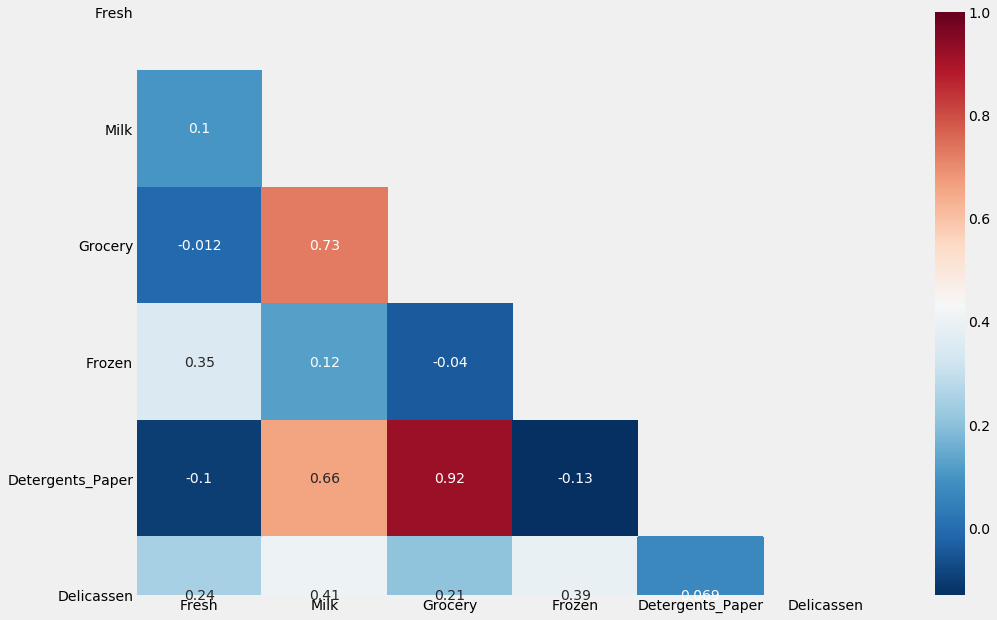

In [36]:
plt.figure(figsize=(15,10))
mask = np.zeros_like(df_min_max.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_min_max.corr(),cmap='RdBu_r',mask=mask, annot=True)

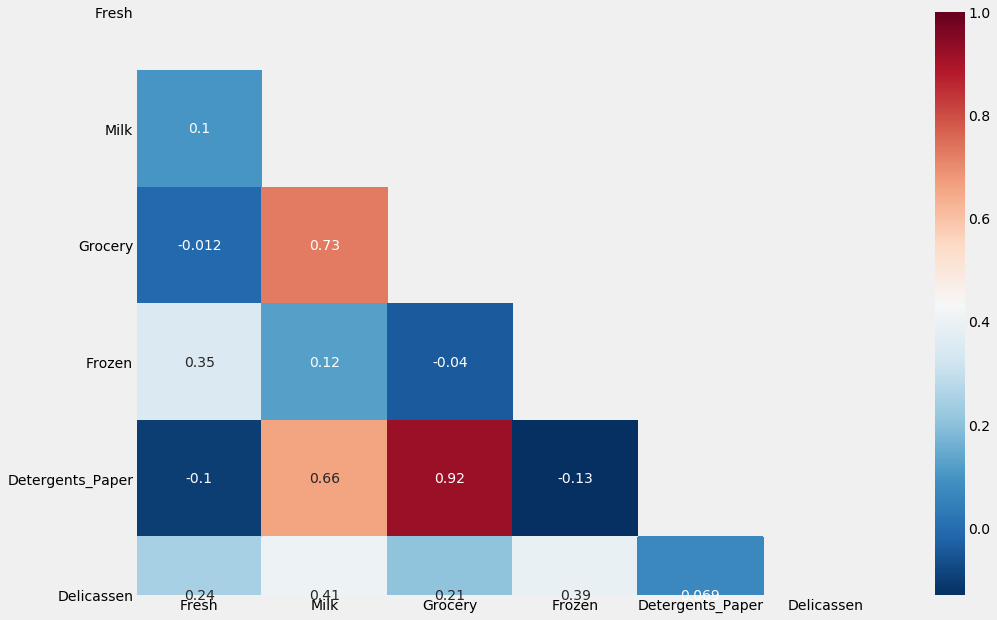

In [37]:
plt.figure(figsize=(15,10))
mask = np.zeros_like(df_sc.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_sc.corr(),cmap='RdBu_r',mask=mask, annot=True)

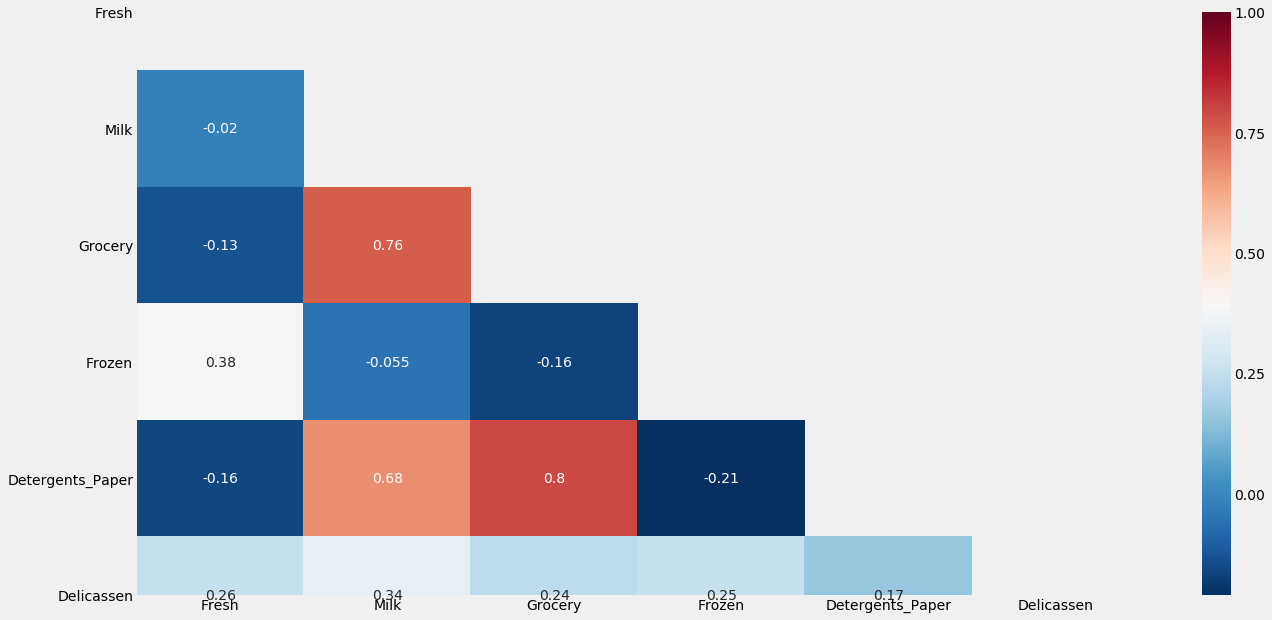

In [38]:
plt.figure(figsize=(20,10))
mask = np.zeros_like(df_log.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_log.corr(),cmap='RdBu_r',mask=mask, annot=True)

* Al aplicar el logaritmo las correlaciones altas existen pero han bajado un poco la existente entre Grocery y Detergents_paper  y ha subido Grocery con Milk.

In [39]:
corr = df_log.corr()

No handles with labels found to put in legend.


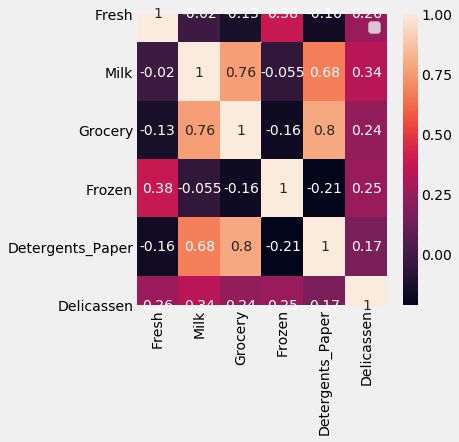

In [40]:
plt.figure(figsize=(5,5))
ax= sns.heatmap(corr, annot=True)
ax.legend(loc=0, prop={'size':15})


* Visualización de todas las variables usando el gráfico de nube de puntos para ver posibles relaciones entre variables.

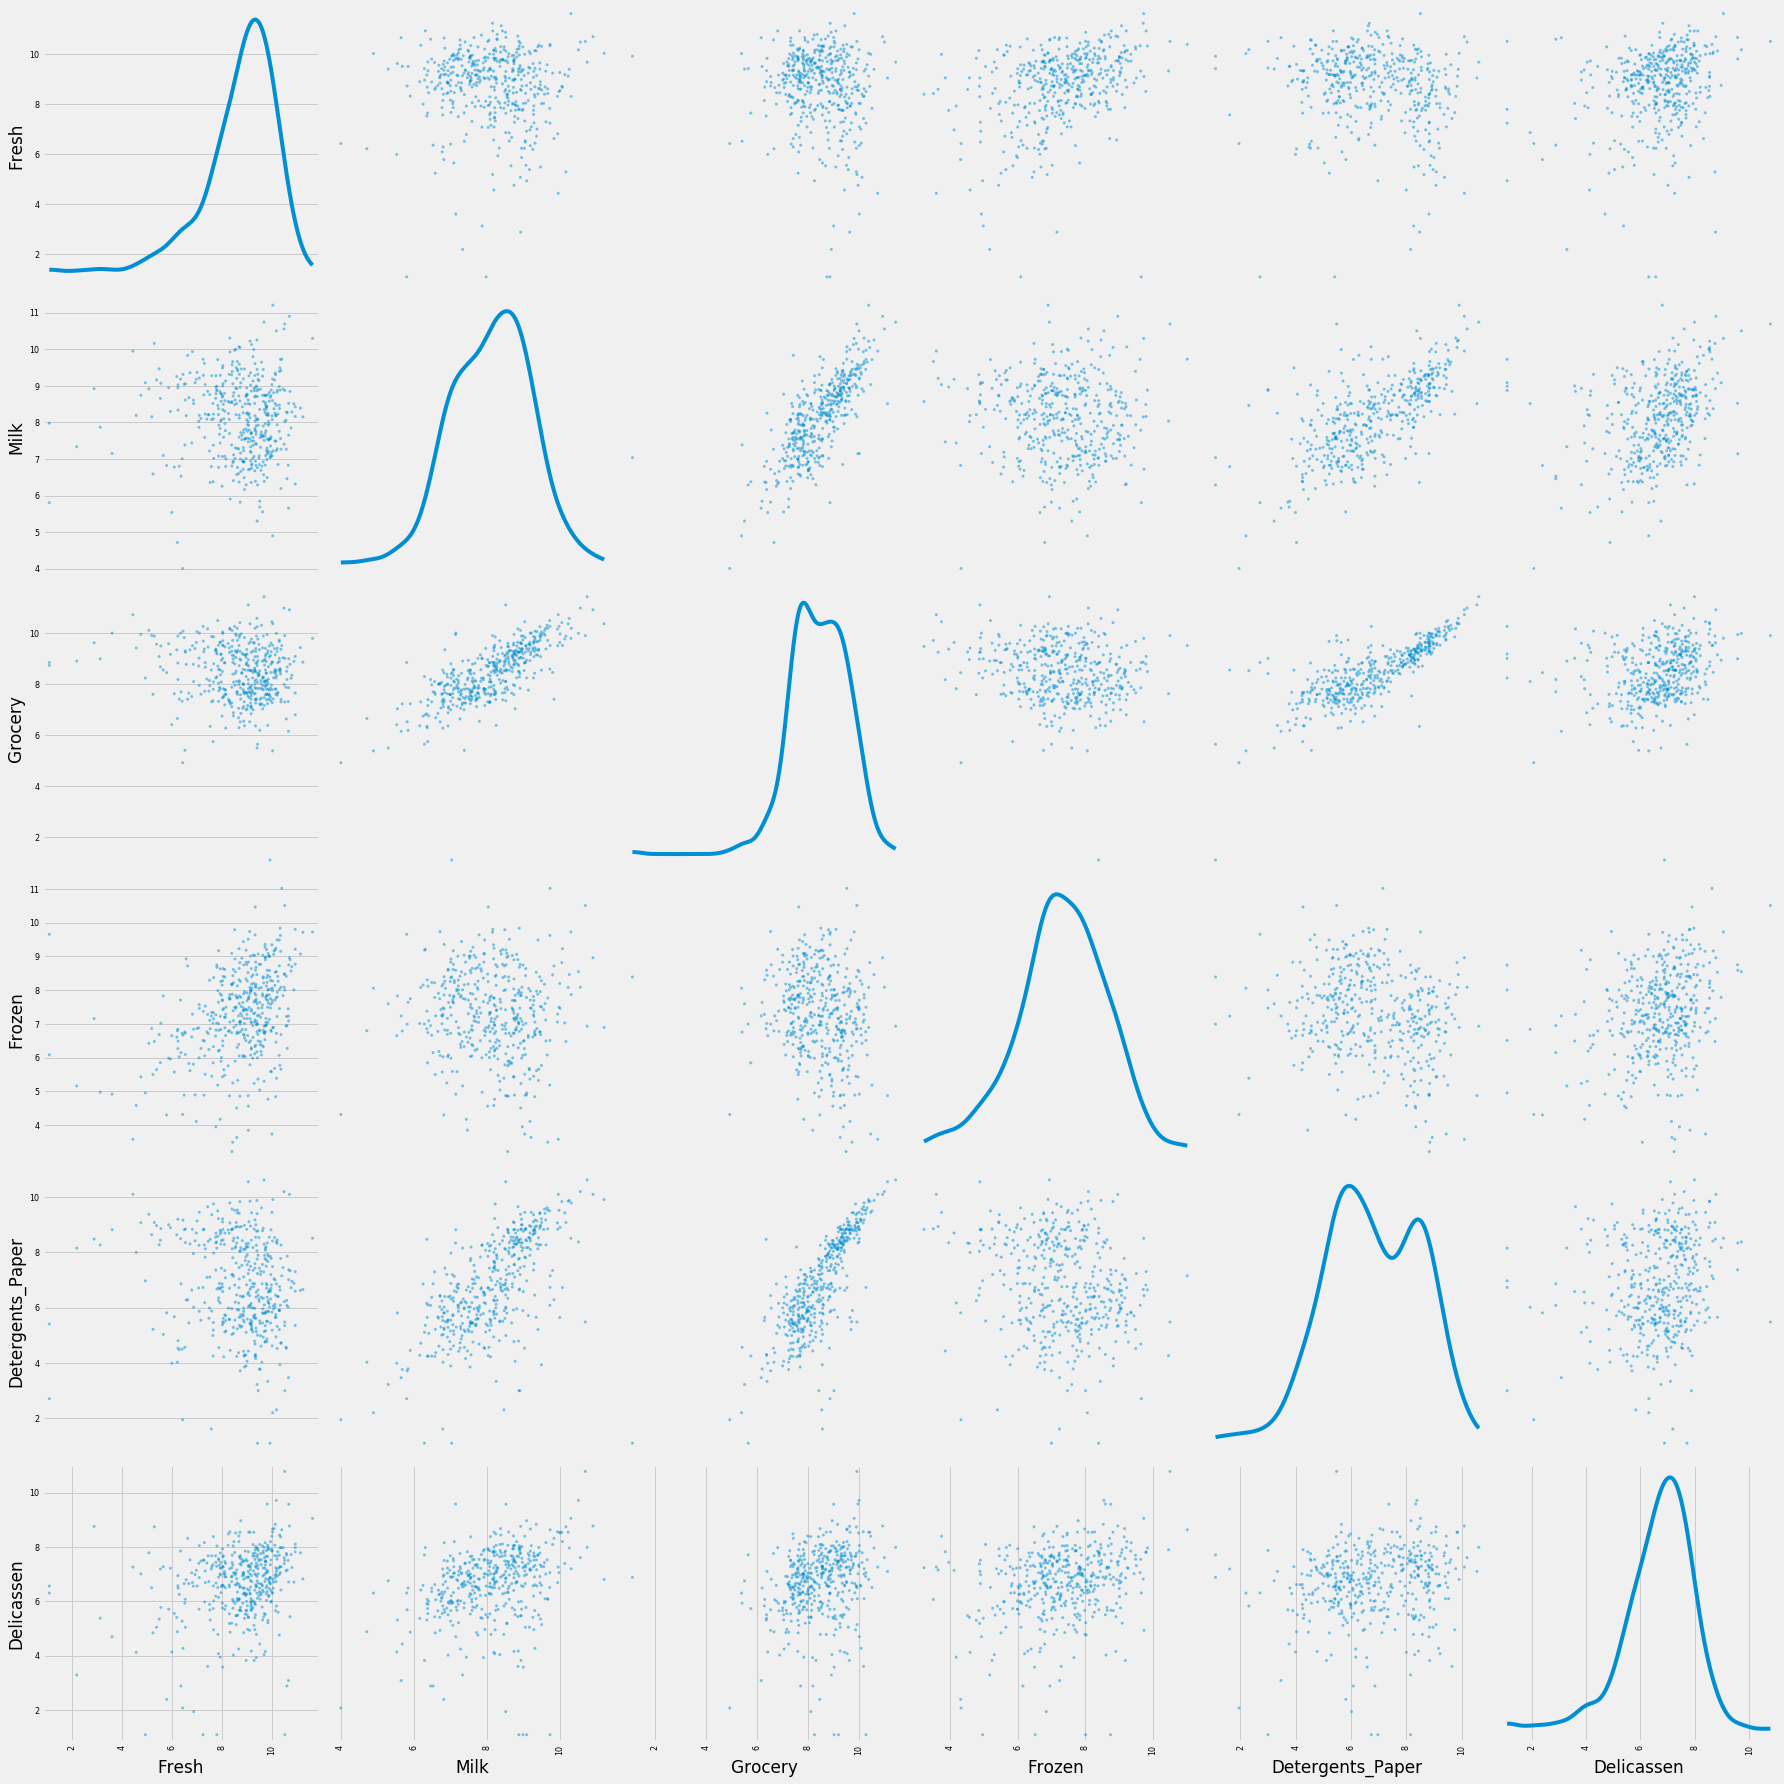

In [41]:
pd.plotting.scatter_matrix(df_log, alpha=0.5, figsize=(25,25),diagonal='kde')
plt.tight_layout()

* Vamos a ver mas de cerca la grafica nube de puntos paara ver su posble relacion entre variables.

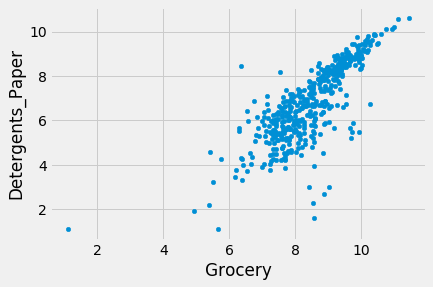

In [42]:
disp= df_log.plot(kind='scatter', x='Grocery', y='Detergents_Paper')

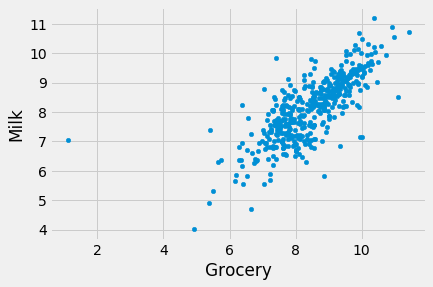

In [43]:
disp= df_log.plot(kind='scatter', x='Grocery', y='Milk')

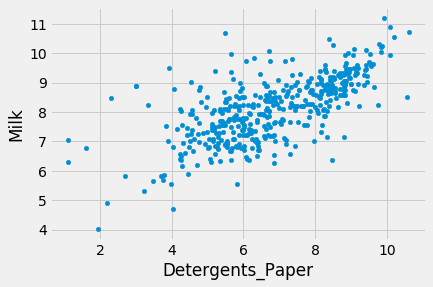

In [44]:
disp= df_log.plot(kind='scatter', x='Detergents_Paper', y='Milk')

In [45]:
df_log.cov()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Fresh,2.190611,-0.031744,-0.219244,0.730058,-0.397039,0.495093
Milk,-0.031744,1.169351,0.915925,-0.076837,1.261686,0.478874
Grocery,-0.219244,0.915925,1.245839,-0.235889,1.529843,0.344897
Frozen,0.730058,-0.076837,-0.235889,1.650043,-0.467734,0.428899
Detergents_Paper,-0.397039,1.261686,1.529843,-0.467734,2.961910,0.376149
Delicassen,0.495093,0.478874,0.344897,0.428899,0.376149,1.718279


* Tienen correlacion alta Detergents_Paper con Grocery (0.8), Detergents_Paper y Milk(0.76), pero a la vez son dependientes al calcular su valor de la covarianza en ambos casos no estan cercano a 0. Vamos a realizar dos moedelos para ver como influyen las variables que tienen alta correlacion y covarianzas altas.


* Deteccion de posibles con los valores outliers

In [46]:
import seaborn as sb

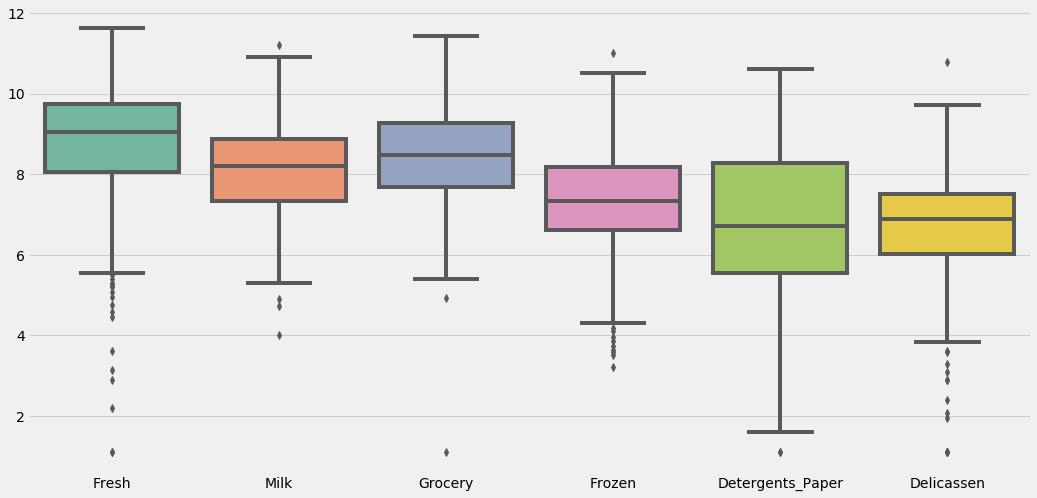

In [47]:
plt.figure(figsize = (16,8))
_ = sns.boxplot(data=df_log, palette="Set2")

* Podemos oberservar en el grafico de cajas y bigotes que todas las variables tienen valores que se pueden considerar outliers.

* Vamos a crear una funcion que realize:
    * Definimos que consideramos valores outliers, son los que estan por encima del percentil 75 y por debajo del percentil 25.
    * Imprimimos todos esos valores por variable.
    * Eliminamos las observaciones que consideramos outilers en todas las variables.

In [48]:
outliers_list = []

for feature in df_log.keys():
    Q1 = np.percentile(df_log[feature], 25)
    Q3 = np.percentile(df_log[feature], 75)
    step = (Q3 - Q1) * 1.5
    print("Observaciones que consideramos outliers de la variable '{}':".format(feature))
    outliers = list(df_log[~((df_log[feature] >= Q1 - step) & (df_log[feature] <= Q3 + step))].index.values)
    display(df_log[~((df_log[feature] >= Q1 - step) & (df_log[feature] <= Q3 + step))])
    outliers_list.extend(outliers)
    
print("Lista de Outliers -> {}".format(outliers_list))
duplicate_outliers_list = list(set([x for x in outliers_list if outliers_list.count(x) >= 2]))
duplicate_outliers_list.sort()
print("\nLista en comun de Outliers -> {}".format(duplicate_outliers_list))

outliers  = duplicate_outliers_list
good_data = df_log.drop(df_log.index[outliers]).reset_index(drop = True)

Observaciones que consideramos outliers de la variable 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Observaciones que consideramos outliers de la variable 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Observaciones que consideramos outliers de la variable 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Observaciones que consideramos outliers de la variable 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Observaciones que consideramos outliers de la variable 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Observaciones que consideramos outliers de la variable 'Delicassen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Lista de Outliers -> [65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412, 86, 98, 154, 356, 75, 154, 38, 57, 65, 145, 175, 264, 325, 420, 429, 439, 75, 161, 66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289, 343]

Lista en comun de Outliers -> [65, 66, 75, 128, 154]


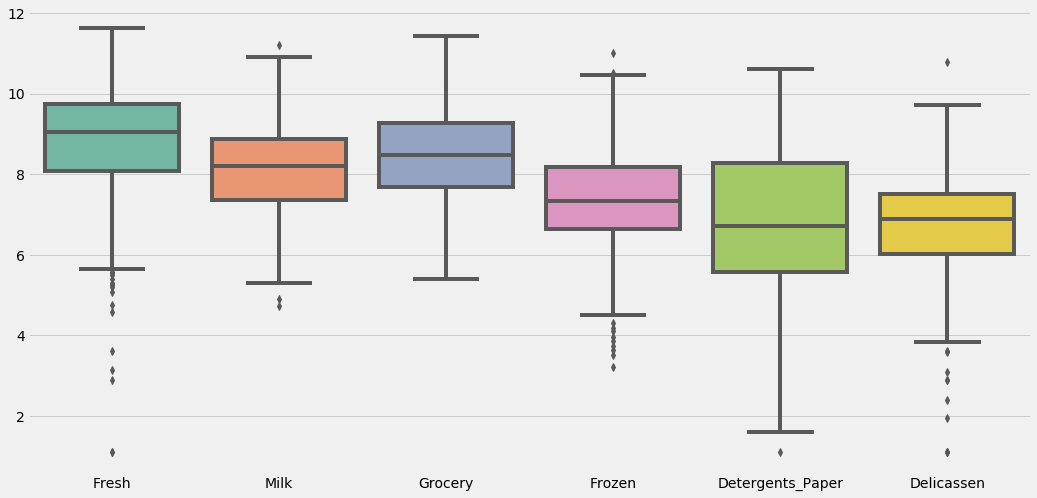

In [49]:
plt.figure(figsize = (16,8))
_ = sns.boxplot(data=good_data, palette="Set2")

In [50]:
good_data.shape

(435, 6)

In [51]:
import pandas_profiling

* Vamos aver en un solo comando mucha informaión sobre los datos despues de las transformaciones realizadas

In [52]:
good_data.profile_report()

# Modelo 1: Usando todas las variables excepto 'Region' y 'Channel'

* Silhouette score es una mejor medida para decidir el número de clústeres que se formularán a partir de los datos. Se calcula para cada instancia y la fórmula es la siguiente: (x-y) / max (x, y)
* y es la distancia media dentro del grupo: distancia media a las otras instancias en el mismo grupo. 
* x representa la distancia media del grupo más cercano, es decir, la distancia media a las instancias del siguiente grupo más cercano.
* El coeficiente varía entre -1 y 1. Un valor cercano a 1 implica que la instancia está cerca de su grupo. Mientras que un valor cercano a -1 significa que el valor está asignado al clúster incorrecto.

In [53]:
def sil_coeff(no_clusters):
    
    clusterer_1 = KMeans(n_clusters=no_clusters, random_state=0 )
    clusterer_1.fit(good_data)
    
    preds_1 = clusterer_1.predict(good_data)
    centers_1 = clusterer_1.cluster_centers_
    
    sample_preds_1 = clusterer_1.predict(good_data)
    
    score = silhouette_score(good_data, preds_1)
    
    print("silhouette coefficient for `{}` clusters => {:.4f}".format(no_clusters, score))
    
clusters_range = range(2,20)
for i in clusters_range:
    sil_coeff(i)

silhouette coefficient for `2` clusters => 0.3045
silhouette coefficient for `3` clusters => 0.2546
silhouette coefficient for `4` clusters => 0.1920
silhouette coefficient for `5` clusters => 0.2011
silhouette coefficient for `6` clusters => 0.2052
silhouette coefficient for `7` clusters => 0.1889
silhouette coefficient for `8` clusters => 0.1845
silhouette coefficient for `9` clusters => 0.1720
silhouette coefficient for `10` clusters => 0.2011
silhouette coefficient for `11` clusters => 0.1830
silhouette coefficient for `12` clusters => 0.1931
silhouette coefficient for `13` clusters => 0.1833
silhouette coefficient for `14` clusters => 0.1730
silhouette coefficient for `15` clusters => 0.1740
silhouette coefficient for `16` clusters => 0.1734
silhouette coefficient for `17` clusters => 0.1895
silhouette coefficient for `18` clusters => 0.1640
silhouette coefficient for `19` clusters => 0.1689


* Sin tener ninguna informacion a priori del conjunto de datos, este metodo pueder ser util para saber en cuantos grupos dividir el conjuto de datos, tomamos la decision de dividirlo por 10.

* Al ser un algoritmo de clasificación no es necesario en dividir los datos en conjunto de prueba y conjuto de test. Aplicamos el algoritmo al conjunto de datos total que tenemos para que cuando entren nuevas observacxiones lo agrupemos correctamente.

In [54]:
model = KMeans(n_clusters=10,
               init='k-means++',
               n_init=10,
               max_iter=300,
               tol=0.0001,
               precompute_distances='auto',
               verbose=0,
               random_state=42,
               copy_x=True,
               n_jobs=None,
               algorithm='auto')

model.fit(good_data)
model.inertia_

1540.4651532663415

* Otro metodo para saber en cuantos cluster dividir los datos, nos basamos en el calculo de inertia a SSE: Se define como la distancia cuadrática media entre cada instancia y su centroide más cercano.

Text(0, 0.5, 'Inertia o SSE')

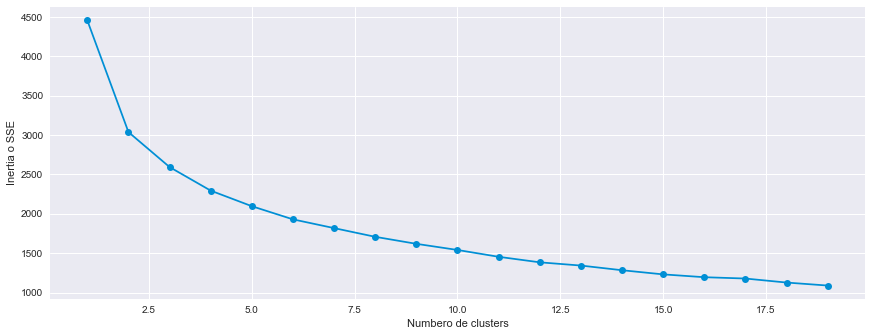

In [55]:
clusters = range(1,20)
sse=[]
for cluster in clusters:
    model = KMeans(n_clusters=cluster, init='k-means++', n_init=10,
               max_iter=300,
               tol=0.0001,
               precompute_distances='auto',
               verbose=0,
               random_state=42,
               copy_x=True,
               n_jobs=None,
               algorithm='auto')
    
    
    model.fit(good_data)
    sse.append(model.inertia_)
    

sse_df = pd.DataFrame(np.column_stack((clusters, sse)), columns=['cluster', 'SSE'])
fig, ax = plt.subplots(figsize=(13, 5))
ax.plot(sse_df['cluster'], sse_df['SSE'], marker='o')
ax.set_xlabel('Numbero de clusters')
ax.set_ylabel('Inertia o SSE')

In [56]:
model = KMeans(n_clusters=10,
               init='k-means++',
               n_init=10,
               max_iter=300,
               tol=0.0001,
               precompute_distances='auto',
               verbose=0,
               random_state=42,
               copy_x=True,
               n_jobs=-1,
               algorithm='auto')

model.fit(good_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [57]:
print('SSE: ', model.inertia_)
print('\nCentroids: \n', model.cluster_centers_)

pred = model.predict(df_log)
data['cluster'] = pred
print('\nCount in each cluster: \n', data['cluster'].value_counts())

SSE:  1540.4651532663415

Centroids: 
 [[ 7.61388849  8.15172827  8.00793683  7.23375418  6.02032412  6.98186579]
 [10.13995451  8.79336004  8.92775606  8.87624329  6.89469119  8.01437555]
 [ 9.44868321  7.43284987  7.73172454  8.40602915  5.89925364  6.78594426]
 [ 5.18269024  8.7487991   9.54340977  6.20473494  8.63591632  6.04196635]
 [ 8.63377563  9.31197614  9.68560251  7.48967577  8.88740322  7.26280668]
 [ 9.53840422  8.19143253  8.65047492  6.48293752  7.35086995  6.89066765]
 [ 6.08943979  6.47311967  7.18544598  6.23224585  5.13114898  4.88418173]
 [ 8.02605046  8.83217968  9.48025539  4.97531336  8.60660129  6.59496097]
 [ 9.24712876  7.01329495  7.33994196  7.14539814  4.60742891  6.31066281]
 [ 8.9148606   8.18735958  8.37408216  7.49012496  6.61411236  3.7223308 ]]

Count in each cluster: 
 2    80
4    71
8    66
5    55
1    41
0    41
7    28
3    23
9    20
6    15
Name: cluster, dtype: int64


# Modelo 2: Quitando las variables que estan correladas y con covarianza positiva.

In [58]:
good_data.drop(['Detergents_Paper', 'Milk', 'Grocery'], axis = 1, inplace = True)

In [59]:
good_data.head()

,Fresh,Frozen,Delicassen
0,9.446913,5.365976,7.198931
1,8.861775,7.474205,7.482119
2,8.756682,7.785305,8.967504
3,9.492884,8.764678,7.488853
4,10.026369,8.272571,8.553525


Text(0, 0.5, 'Inertia o SSE')

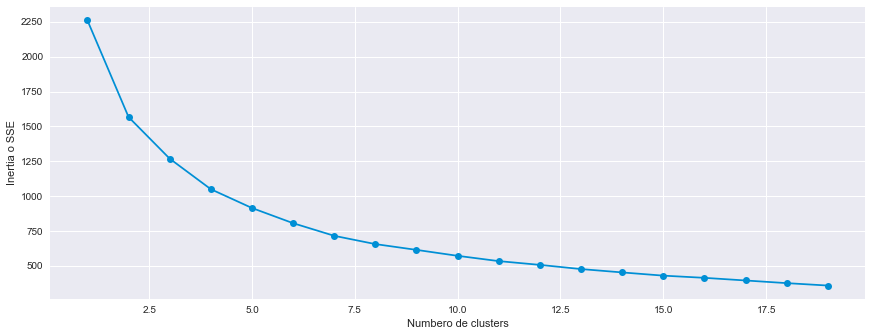

In [60]:
clusters = range(1,20)
sse=[]
for cluster in clusters:
    model_2 = KMeans(n_clusters=cluster, init='k-means++', n_init=10,
               max_iter=300,
               tol=0.0001,
               precompute_distances='auto',
               verbose=0,
               random_state=42,
               copy_x=True,
               n_jobs=None,
               algorithm='auto')
    
    
    model_2.fit(good_data)
    sse.append(model_2.inertia_)
    

sse_df = pd.DataFrame(np.column_stack((clusters, sse)), columns=['cluster', 'SSE'])
fig, ax = plt.subplots(figsize=(13, 5))
ax.plot(sse_df['cluster'], sse_df['SSE'], marker='o')
ax.set_xlabel('Numbero de clusters')
ax.set_ylabel('Inertia o SSE')

In [82]:
model_3 = KMeans(n_clusters=9,
               init='k-means++',
               n_init=10,
               max_iter=300,
               tol=0.0001,
               precompute_distances='auto',
               verbose=0,
               random_state=42,
               copy_x=True,
               n_jobs=-1,
               algorithm='auto')

model_3.fit(good_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [83]:
print('SSE: ', model_3.inertia_)
print('\nCentroids: \n', model_3.cluster_centers_)

pred = model_3.predict(good_data)
good_data['cluster'] = pred
print('\nCount in each cluster: \n', good_data['cluster'].value_counts())

SSE:  652.4008796571048

Centroids: 
 [[ 9.61733697e+00  8.24738998e+00  6.73868422e+00  2.00000000e+00]
 [ 9.54495840e+00  6.64558885e+00  6.93373518e+00 -1.77635684e-15]
 [ 1.00362634e+01  8.95998630e+00  8.06354141e+00  4.00000000e+00]
 [ 8.04467384e+00  4.99687322e+00  6.83807539e+00  2.00000000e+00]
 [ 7.20470331e+00  6.36785449e+00  3.11024299e+00  3.00000000e+00]
 [ 8.98033610e+00  7.71220301e+00  5.19313140e+00  8.36065574e-01]
 [ 8.01695763e+00  7.53512242e+00  7.27901452e+00  9.87341772e-01]
 [ 6.03040123e+00  6.27791512e+00  6.18562956e+00  3.00000000e+00]
 [ 2.36680169e+00  6.55941874e+00  6.34276404e+00  1.00000000e+00]]

Count in each cluster: 
 1    102
6     79
0     62
5     61
2     54
7     30
3     30
4     12
8      5
Name: cluster, dtype: int64


In [84]:
good_data

,Fresh,Frozen,Delicassen,cluster
0,9.446913,5.365976,7.198931,1
1,8.861775,7.474205,7.482119,6
2,8.756682,7.785305,8.967504,6
3,9.492884,8.764678,7.488853,2
4,10.026369,8.272571,8.553525,2
...,...,...,...,...
430,10.299003,9.483036,7.698029,2
431,10.577146,8.414052,7.760467,2
432,9.584040,6.079933,7.532088,1
433,9.238928,6.945051,7.661527,1


* Conclusiones:
    * Para este conjunto de datos, el mejor resultado lo da realizando transformación logarítmica, eliminando las filas comunes que hemos considerado outliers, eliminado las filas que tienen alta correlacion y covarianza tanto positivia como negativas altas y agrupando en 10 clusters.


https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/

In [101]:
#####################################################################################################

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [103]:
X = np.array(good_data[["Fresh","Frozen","Delicassen"]])
y = np.array(good_data['cluster'])
X.shape

(435, 3)

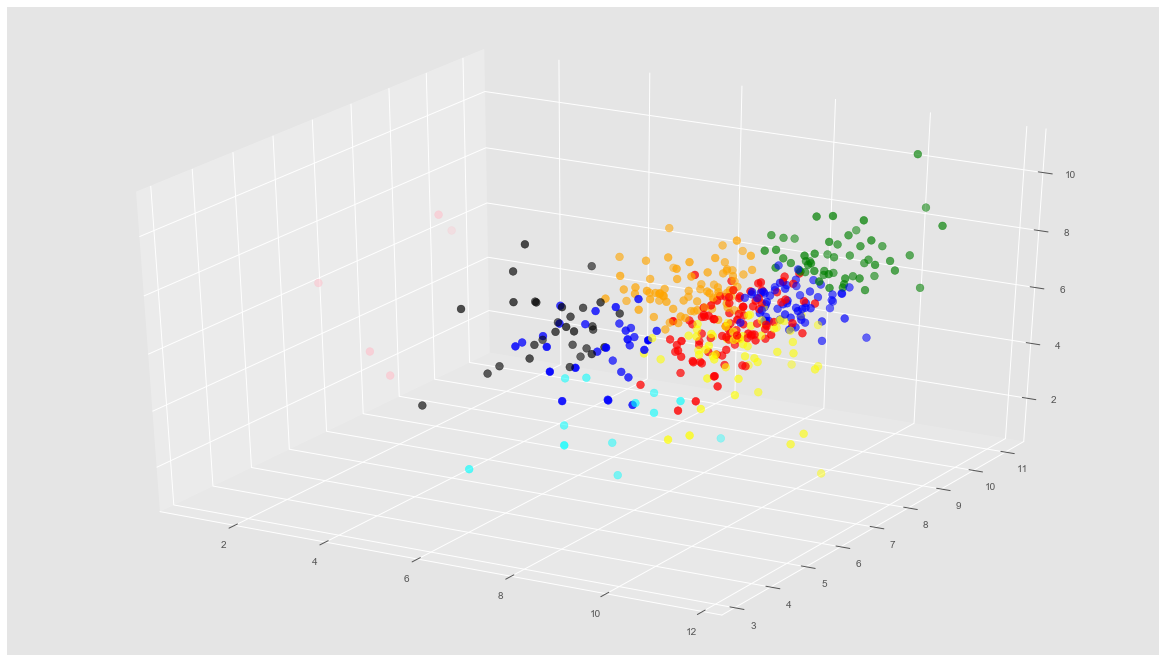

In [104]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

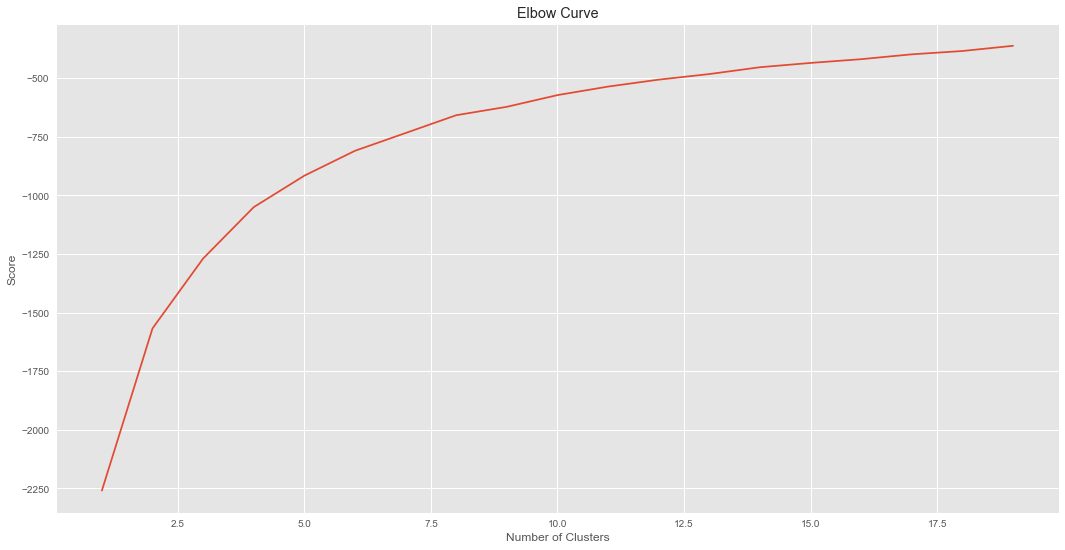

In [105]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [106]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[9.28687848 6.14673804 6.78263032]
 [8.04237545 7.47713605 7.20012314]
 [9.82966767 8.47098255 7.47495171]
 [5.79703598 6.03048134 6.00007404]
 [8.96399464 7.64209344 4.95210207]]


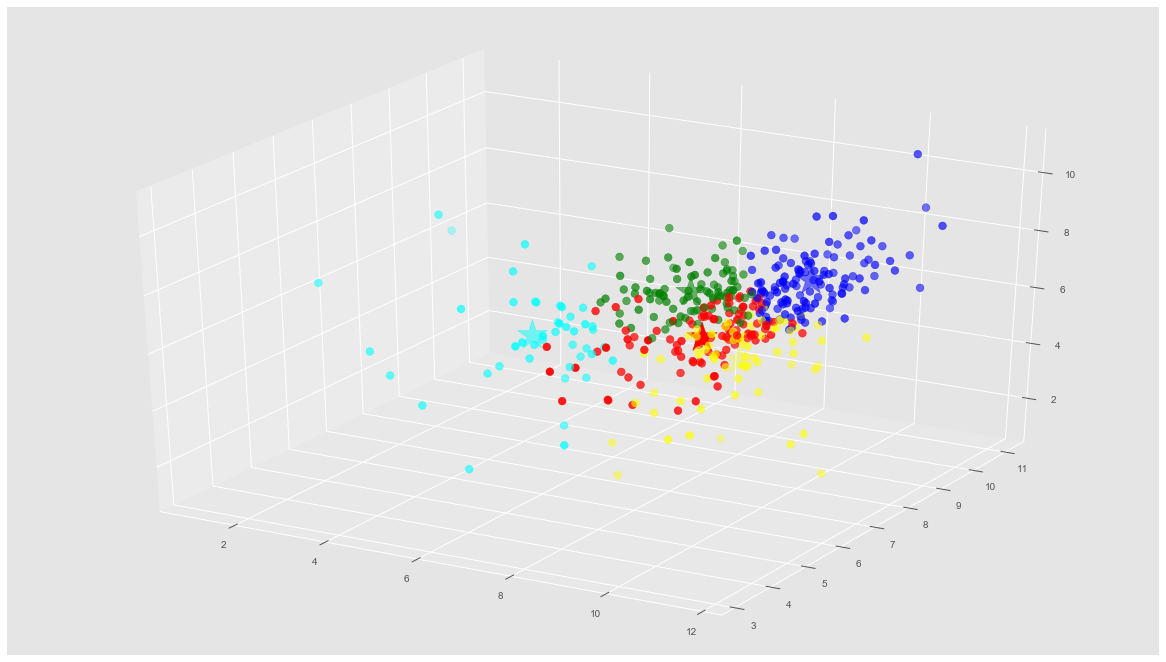

In [107]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

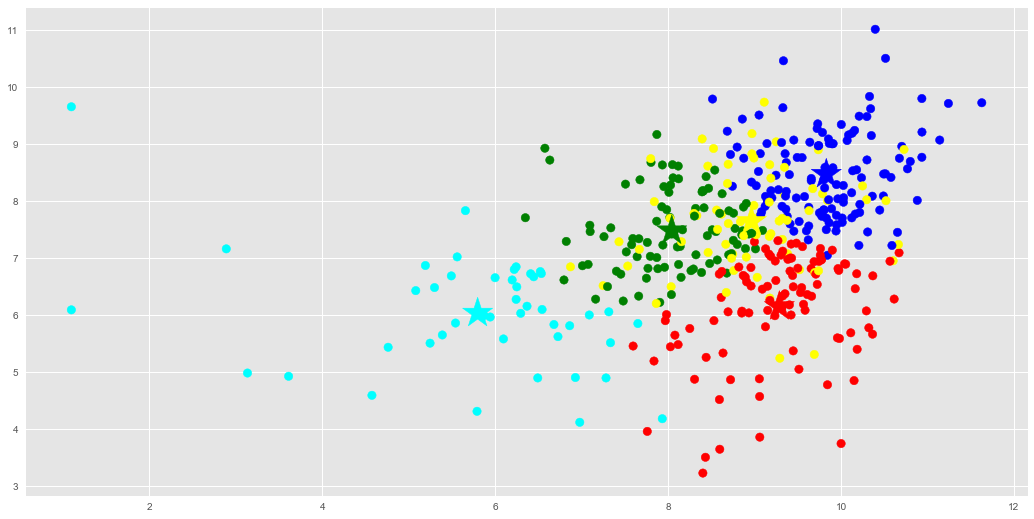

In [108]:
# Getting the values and plotting it
f1 = good_data['Fresh'].values
f2 = good_data['Frozen'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

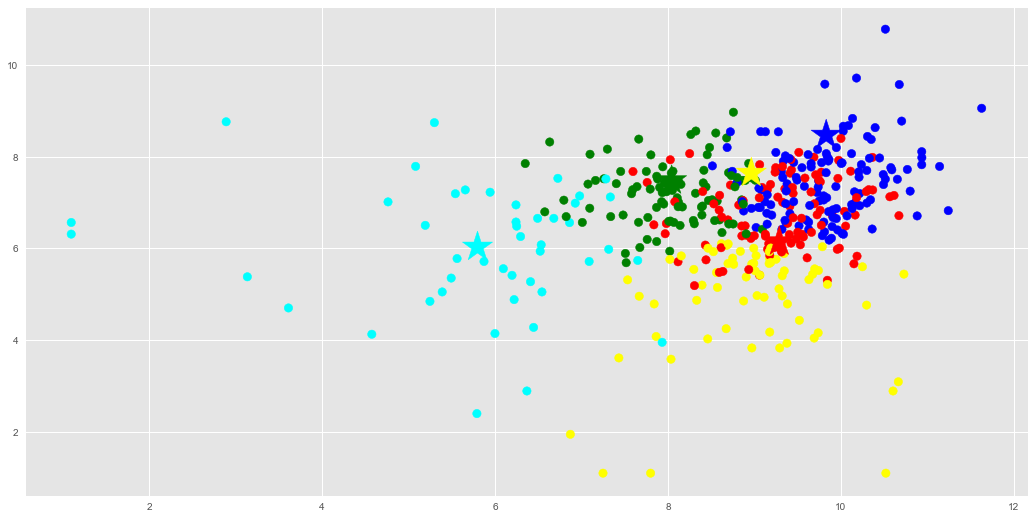

In [109]:
f1 = good_data['Fresh'].values
f2 = good_data['Delicassen'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

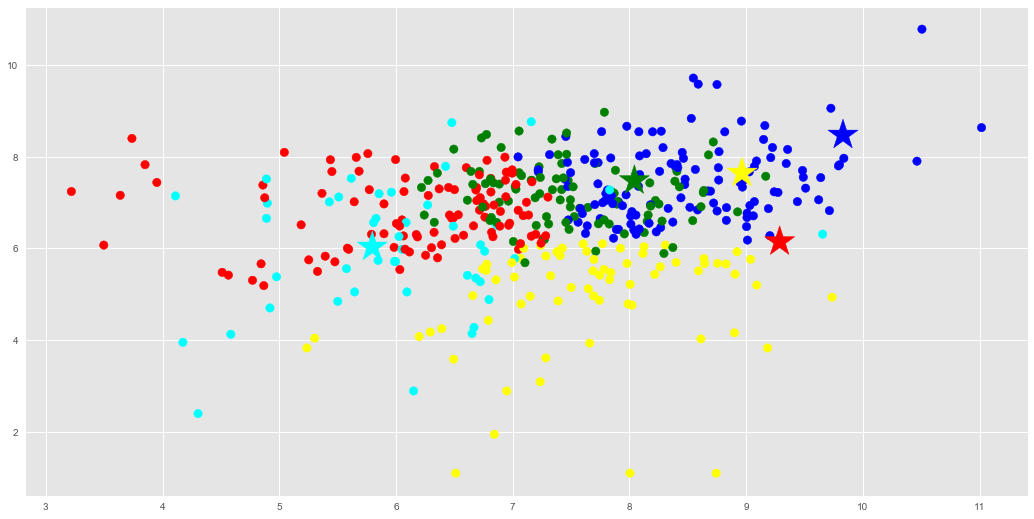

In [110]:
f1 = good_data['Frozen'].values
f2 = good_data['Delicassen'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

In [111]:
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[6.68184988 6.20042744 6.68146313]
 [9.47830031 7.95667167 7.40476205]
 [8.92552631 6.98998042 5.50053596]]


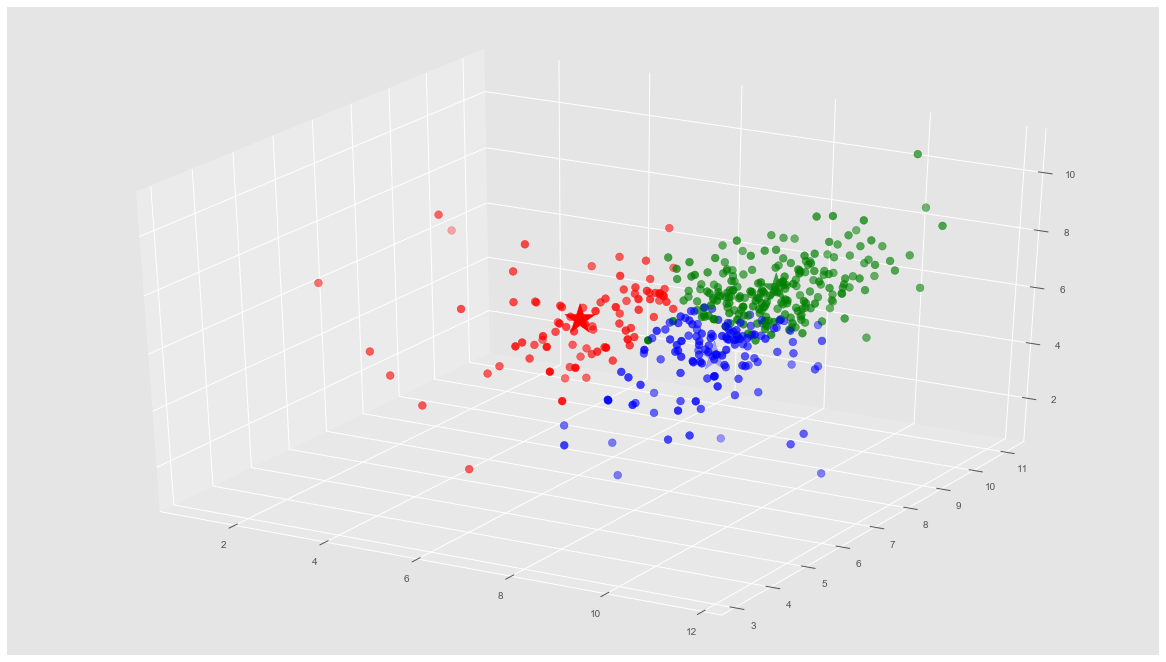

In [112]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

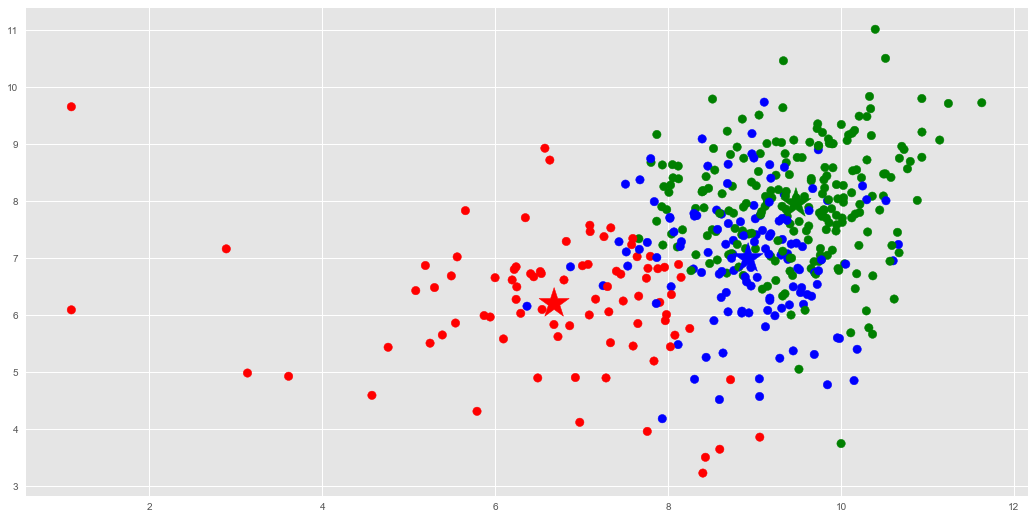

In [113]:
# Getting the values and plotting it
f1 = good_data['Fresh'].values
f2 = good_data['Frozen'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

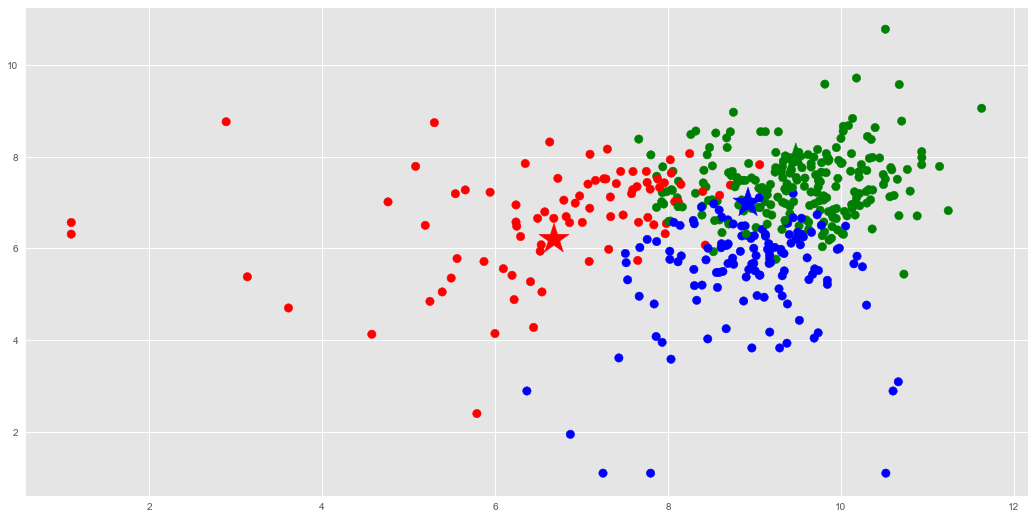

In [114]:
f1 = good_data['Fresh'].values
f2 = good_data['Delicassen'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

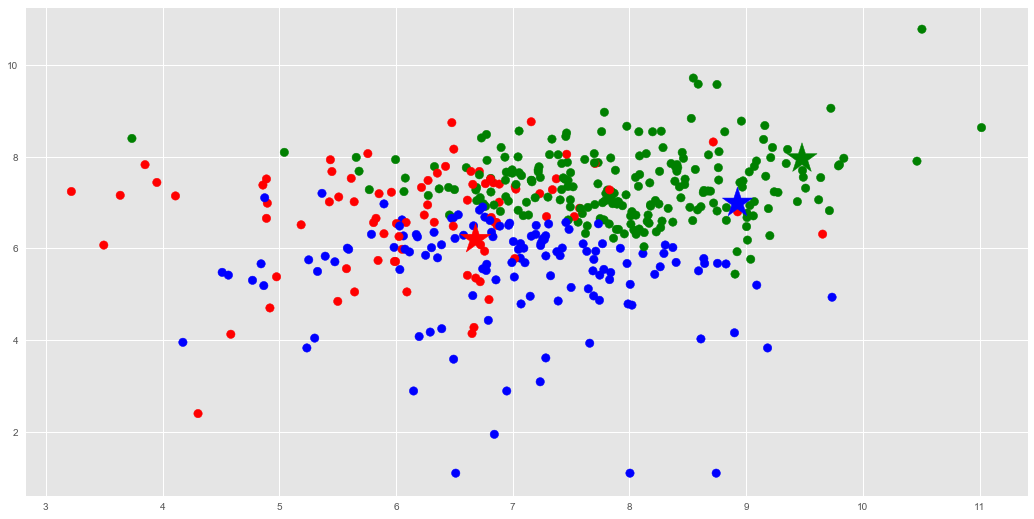

In [115]:
f1 = good_data['Frozen'].values
f2 = good_data['Delicassen'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()